In [2]:
import sys
sys.path.append("/home/bl9/gempy/")
import gempy as gp

%matplotlib inline
import pymc
import numpy as np
import math

#import geobayes_simple as gs
from IPython.core.display import Image

from pymc.Matplot import plot
from pymc import graph

from IPython.core.pylabtools import figsize
figsize(15, 6)

#import seaborn
#seaborn.set_context(font_scale=2)
#seaborn.set_style("white")

import scipy.optimize as sop
import scipy.stats as stats
from scipy.signal import argrelextrema

import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

#import visualization_vtk as vv

/home/bl9/gempy/gempy/Visualization.py:15: UserWarning: Vtk package is not installed. No vtk visualization available.
  warnings.warn('Vtk package is not installed. No vtk visualization available.')


In [3]:
# Importing the data from csv files and settign extent and resolution
geo_data = gp.create_data([0,2000,0,2000,-2000,0],[ 50,50,50],
                         path_f = "/home/bl9/gempy//input_data/FabLessPoints_Foliations.csv",
                         path_i = "/home/bl9/gempy//input_data/FabLessPoints_Points.csv")
geo_data.n_faults = 1

In [4]:
gp.set_data_series(geo_data, {"fault":'MainFault', 
                      "Rest":('Reservoir', 'Seal', 'NonReservoirDeep','SecondaryReservoir')},
                       order_series = ["fault",
                                       "Rest",
                                       ], verbose=0)

In [5]:
gp.data_to_pickle(geo_data, 'BasicFault')

In [6]:
# stdev for x,y,z interface coordinates
geo_data.interfaces['X_std'] = None
geo_data.interfaces['Y_std'] = None
geo_data.interfaces['Z_std'] = None
geo_data.interfaces['dist_type'] = "Normal" # should be initially None
geo_data.interfaces['X_dist'] = None
geo_data.interfaces['Y_dist'] = None
geo_data.interfaces['Z_dist'] = None

In [7]:
geo_data.interfaces.head()

,X,Y,Z,formation,series,order_series,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist
0,800.0,1000.0,-1600.0,MainFault,fault,1,True,None,None,None,Normal,None,None,None
1,1200.0,1000.0,-400.0,MainFault,fault,1,True,None,None,None,Normal,None,None,None
2,1100.0,1000.0,-700.0,MainFault,fault,1,True,None,None,None,Normal,None,None,None
3,900.0,1000.0,-1300.0,MainFault,fault,1,True,None,None,None,Normal,None,None,None
4,1000.0,1000.0,-1000.0,MainFault,fault,1,True,None,None,None,Normal,None,None,None


In [8]:
#geo_data.interfaces["Z_std"].iloc[0] = 500


In [9]:
interp_data = gp.InterpolatorInput(geo_data, 
                                   u_grade = [3, 3],
                                   compile_theano=True)

[2, 2]


In [10]:
interp_fixed = interp_data

In [11]:
sol = gp.compute_model(interp_data)

[3, 3]


In [12]:
sol.shape

(3, 125000)

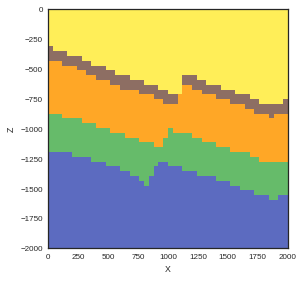

In [13]:
gp.plot_section(geo_data, sol[0,:], 25)

In [14]:
interp_data.get_formation_number()

{'DefaultBasement': 0,
 'MainFault': 1,
 'NonReservoirDeep': 5,
 'Reservoir': 2,
 'Seal': 4,
 'SecondaryReservoir': 3}

In [15]:
z_res_top = pymc.Normal('z_unc_res', 0, 1./0.0001)

In [16]:
#a = interp_data.geo_data_res.interfaces[interp_data.geo_data_res.interfaces['formation'] == 'Seal']
#a['Z'] = z_res_top

In [17]:
#interp_data.geo_data_res.interfaces.ix[interp_data.geo_data_res.interfaces.formation=='Reservoir', 'Z'] += [z_res_top]

In [18]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist,formation number
0,0.410356,0.5001,0.346254,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
1,0.512921,0.5001,0.653946,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
2,0.487279,0.5001,0.577023,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
3,0.435997,0.5001,0.423177,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
4,0.461638,0.5001,0.5001,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
5,0.282151,0.5001,0.512921,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
6,0.718049,0.5001,0.429587,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
7,0.692408,0.5001,0.423177,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
8,0.538562,0.5001,0.474459,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
9,0.359074,0.5001,0.487279,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2


In [19]:
i,s = gp.get_surface(sol[1, :], interp_data, 2)

In [20]:
interp_data.geo_data_res.interfaces

,X,Y,Z,formation,series,order_series,isFault,X_std,Y_std,Z_std,dist_type,X_dist,Y_dist,Z_dist,formation number
0,0.410356,0.5001,0.346254,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
1,0.512921,0.5001,0.653946,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
2,0.487279,0.5001,0.577023,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
3,0.435997,0.5001,0.423177,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
4,0.461638,0.5001,0.5001,MainFault,fault,1,True,NaN,NaN,NaN,Normal,None,None,None,1
5,0.282151,0.5001,0.512921,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
6,0.718049,0.5001,0.429587,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
7,0.692408,0.5001,0.423177,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
8,0.538562,0.5001,0.474459,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2
9,0.359074,0.5001,0.487279,Reservoir,Rest,2,False,NaN,NaN,NaN,Normal,None,None,None,2


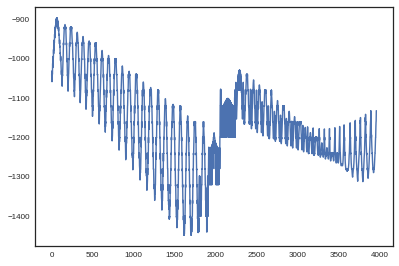

In [21]:
plt.plot(i[:,2])

In [22]:
@pymc.deterministic
def z_interp(input_ = interp_data, z_unc = z_res_top, b = interp_fixed):
    #change = input_.geo_data_res.interfaces.ix[input_.geo_data_res.interfaces.formation=='Reservoir', 'Z'] + [z_unc]
    print(z_unc)
    a = input_.geo_data_res.interfaces[input_.geo_data_res.interfaces['formation'] == 'Reservoir']
    a['Z'] += z_res_top
    b.geo_data_res.interfaces[b.geo_data_res.interfaces['formation'] == 'Reservoir', 'Z'] = a
    #input_.geo_data_res.interfaces.ix[input_.geo_data_res.interfaces.formation=='Reservoir', 'Z'] += [z_unc]
    return b

@pymc.deterministic
def z_model(interp = z_interp):
    sol = gp.compute_model(interp)
    gp.plot_section(geo_data, sol[0,:], 25)
    return sol

#interp_data.geo_data_res.interfaces

0.006781628705123283


/home/bl9/anaconda3/lib/python3.5/site-packages/pymc/Node.py:403: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  self.__name__ = input['__name__']
/home/bl9/anaconda3/lib/python3.5/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


TypeError: 'Series' objects are mutable, thus they cannot be hashed

In [ ]:
iterations = 10

In [ ]:
# set model
#model = pymc.Model([z_res_top, z_interp, z_model])
model = pymc.Model([z_res_top, z_model])

In [ ]:
M = pymc.MCMC(model)
M.sample(iter=iterations)

In [ ]:
bla = M.trace('z_unc_res')[:]
#ble = M.trace('z_interp')[:]
bli = M.trace('z_model')[:]
bla.shape

In [ ]:
for j in range(iterations):
    plt.figure()
    plt.title('Change in res_top: %s' % bla[j])
    print(bla[j])
    gp.plot_section(geo_data, bli[j,0], 25)

In [ ]:
plt.plot(bla)

In [ ]:
interp_data.geo_data_res.interfaces